In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [8]:
data = pd.read_csv('/content/Company_Data.csv')

In [9]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
data.shape

(400, 11)

In [12]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [14]:
label_encoder = preprocessing.LabelEncoder()
for i in data.columns:
    print(i)
    if data[i].dtypes == object:
        data[i] = label_encoder.fit_transform(data[i])
    else:
        pass

Sales
CompPrice
Income
Advertising
Population
Price
ShelveLoc
Age
Education
Urban
US


In [15]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [43]:
x = data.iloc[:, 1:]
y = data['Sales']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [67]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [68]:
preds = model.predict(x_test)

In [69]:
preds

array([ 6.40428571,  2.54571429,  9.25822222,  5.4032    ,  6.84856061,
        5.4032    , 12.05272727,  6.40428571,  9.25822222,  9.25822222,
        6.84856061,  6.84856061,  9.74541667,  6.84856061,  9.25822222,
        9.74541667,  9.25822222, 12.05272727,  6.84856061,  6.84856061,
        9.74541667,  6.84856061,  5.4032    ,  6.84856061,  5.4032    ,
        6.84856061,  6.84856061,  6.40428571,  6.84856061,  6.84856061,
        9.25822222,  9.25822222,  6.84856061,  5.4032    ,  9.25822222,
        6.84856061,  5.4032    ,  6.84856061,  9.25822222,  5.4032    ,
        2.54571429,  6.84856061,  9.74541667, 12.05272727,  9.25822222,
        6.84856061,  6.84856061,  9.74541667,  6.84856061,  6.84856061,
        9.74541667,  6.84856061,  6.84856061,  9.25822222,  6.84856061,
        5.4032    ,  6.84856061,  9.25822222, 12.05272727,  9.25822222,
        9.25822222,  9.25822222,  9.9175    ,  6.84856061,  6.84856061,
        6.84856061,  9.25822222,  6.84856061,  5.4032    ,  9.25

In [70]:
pd.crosstab(y_test, preds)

col_0,2.545714,5.403200,6.404286,6.848561,9.258222,9.745417,9.917500,12.052727
Sales,,,,,,,,
0.91,0,1,0,0,0,0,0,0
2.23,0,1,0,0,0,0,0,0
2.86,1,0,0,0,0,0,0,0
3.02,0,0,1,0,0,0,0,0
3.07,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
13.44,0,0,0,0,1,0,0,0
13.55,0,0,0,0,0,0,0,1
13.91,0,0,0,0,0,0,0,1


In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model.predict(x_test))

4.016841281436861

In [73]:
label = x_test.columns
label

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

[Text(465.0, 792.75, 'Price <= 94.5\nmse = 7.665\nsamples = 280\nvalue = 7.356'),
 Text(232.5, 566.25, 'ShelveLoc <= 0.5\nmse = 5.765\nsamples = 46\nvalue = 9.804'),
 Text(116.25, 339.75, 'CompPrice <= 118.5\nmse = 5.553\nsamples = 11\nvalue = 7.682'),
 Text(58.125, 113.25, 'mse = 2.686\nsamples = 7\nvalue = 6.404'),
 Text(174.375, 113.25, 'mse = 2.717\nsamples = 4\nvalue = 9.918'),
 Text(348.75, 339.75, 'ShelveLoc <= 1.5\nmse = 3.971\nsamples = 35\nvalue = 10.471'),
 Text(290.625, 113.25, 'mse = 2.533\nsamples = 11\nvalue = 12.053'),
 Text(406.875, 113.25, 'mse = 2.957\nsamples = 24\nvalue = 9.745'),
 Text(697.5, 566.25, 'ShelveLoc <= 0.5\nmse = 6.629\nsamples = 234\nvalue = 6.874'),
 Text(581.25, 339.75, 'Price <= 143.5\nmse = 4.085\nsamples = 57\nvalue = 5.052'),
 Text(523.125, 113.25, 'mse = 3.235\nsamples = 50\nvalue = 5.403'),
 Text(639.375, 113.25, 'mse = 2.993\nsamples = 7\nvalue = 2.546'),
 Text(813.75, 339.75, 'ShelveLoc <= 1.5\nmse = 6.035\nsamples = 177\nvalue = 7.461'),
 T

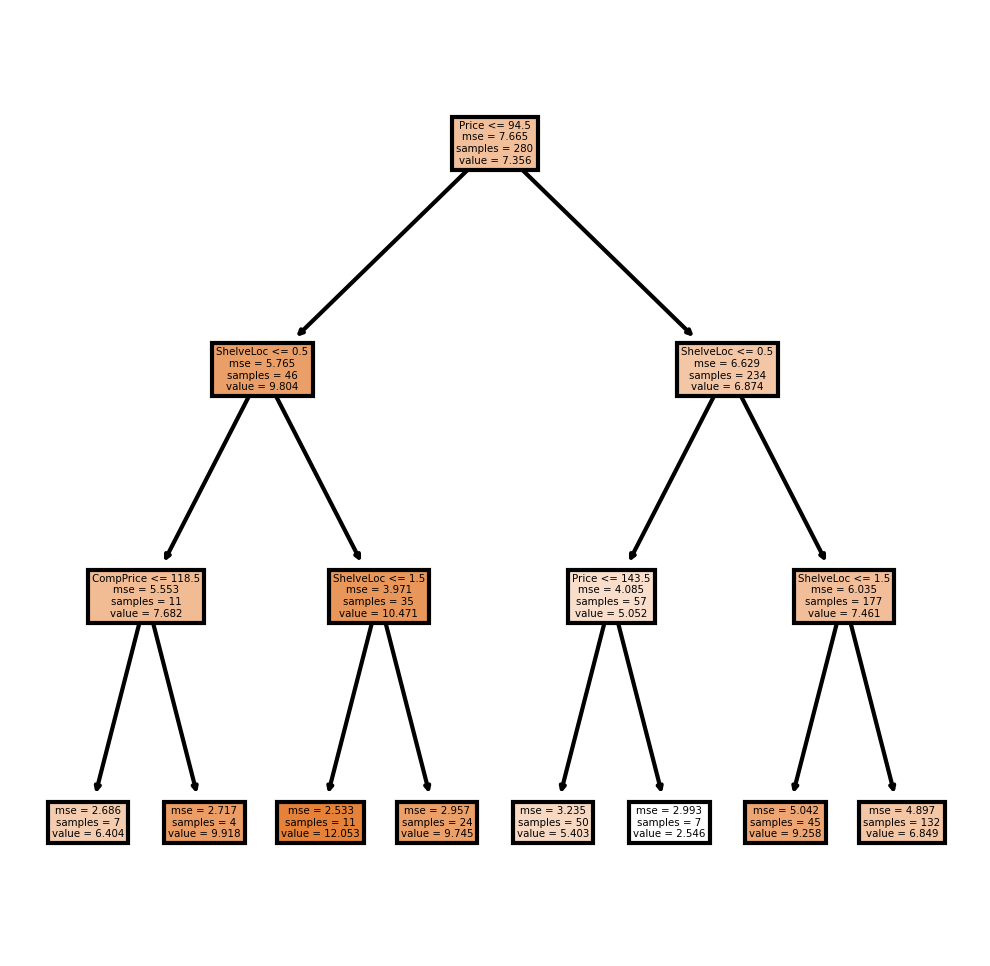

In [74]:
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn = ['Sales']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (4,4), dpi=300)
tree.plot_tree(model, feature_names= fn, class_names=cn, filled=True)

In [108]:
#Accuracy
model.score(x_test, y_test)

0.5263023772875566

It is same as the classifier Decision Tree but in the place of class we have values.

#Decision Tree Classifier

In [75]:
data1 = pd.read_csv('Company_Data.csv')
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [76]:
data1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [78]:
data1['Status'] = data1['Sales'].apply(lambda Sales: 'Low' if Sales <= 7.5 else 'High')

In [79]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [83]:
data1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
Status          object
dtype: object

In [85]:
encoder = preprocessing.LabelEncoder()

for i in data1.columns:
    print(i)
    if data1[i].dtypes == object:
        data1[i] = encoder.fit_transform(data1[i])
    else:
        pass

Sales
CompPrice
Income
Advertising
Population
Price
ShelveLoc
Age
Education
Urban
US
Status


In [88]:
data1.drop(['Sales'], axis=1, inplace=True)

In [89]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [91]:
x1 = data1.iloc[:, 0:10]
y1 = data1.iloc[:,10]

In [92]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size= 0.3, random_state=42)

In [93]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model1.fit(x_train1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [94]:
preds1 = model1.predict(x_test1)
preds1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [99]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1,preds1))

[[53 12]
 [27 28]]


[Text(153.45000000000002, 190.26, 'X[4] <= 90.5\nentropy = 0.998\nsamples = 280\nvalue = [133, 147]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\nentropy = 0.422\nsamples = 35\nvalue = [32, 3]'),
 Text(55.800000000000004, 81.53999999999999, 'X[3] <= 302.0\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(83.7, 27.180000000000007, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(223.20000000000002, 135.9, 'X[5] <= 0.5\nentropy = 0.978\nsamples = 245\nvalue = [101, 144]'),
 Text(167.4, 81.53999999999999, 'X[6] <= 63.5\nentropy = 0.616\nsamples = 59\nvalue = [9, 50]'),
 Text(139.5, 27.180000000000007, 'entropy = 0.75\nsamples = 42\nvalue = [9, 33]'),
 Text(195.3, 27.180000000000007, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(279.0, 81.53999999999999, 'X[4] <= 135.5\nentropy = 1.0\nsamples = 1

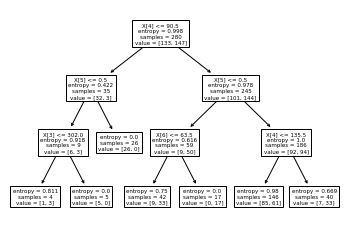

In [100]:
tree.plot_tree(model1)

[Text(1065.625, 1981.875, 'Price <= 90.5\nentropy = 0.998\nsamples = 280\nvalue = [133, 147]\nclass = High'),
 Text(581.25, 1415.625, 'ShelveLoc <= 0.5\nentropy = 0.422\nsamples = 35\nvalue = [32, 3]\nclass = Low'),
 Text(387.5, 849.375, 'Population <= 302.0\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]\nclass = Low'),
 Text(193.75, 283.125, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = High'),
 Text(581.25, 283.125, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Low'),
 Text(775.0, 849.375, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]\nclass = Low'),
 Text(1550.0, 1415.625, 'ShelveLoc <= 0.5\nentropy = 0.978\nsamples = 245\nvalue = [101, 144]\nclass = High'),
 Text(1162.5, 849.375, 'Age <= 63.5\nentropy = 0.616\nsamples = 59\nvalue = [9, 50]\nclass = High'),
 Text(968.75, 283.125, 'entropy = 0.75\nsamples = 42\nvalue = [9, 33]\nclass = High'),
 Text(1356.25, 283.125, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = High'),
 Text(1937.5, 849.375, 'Price <= 135.5\n

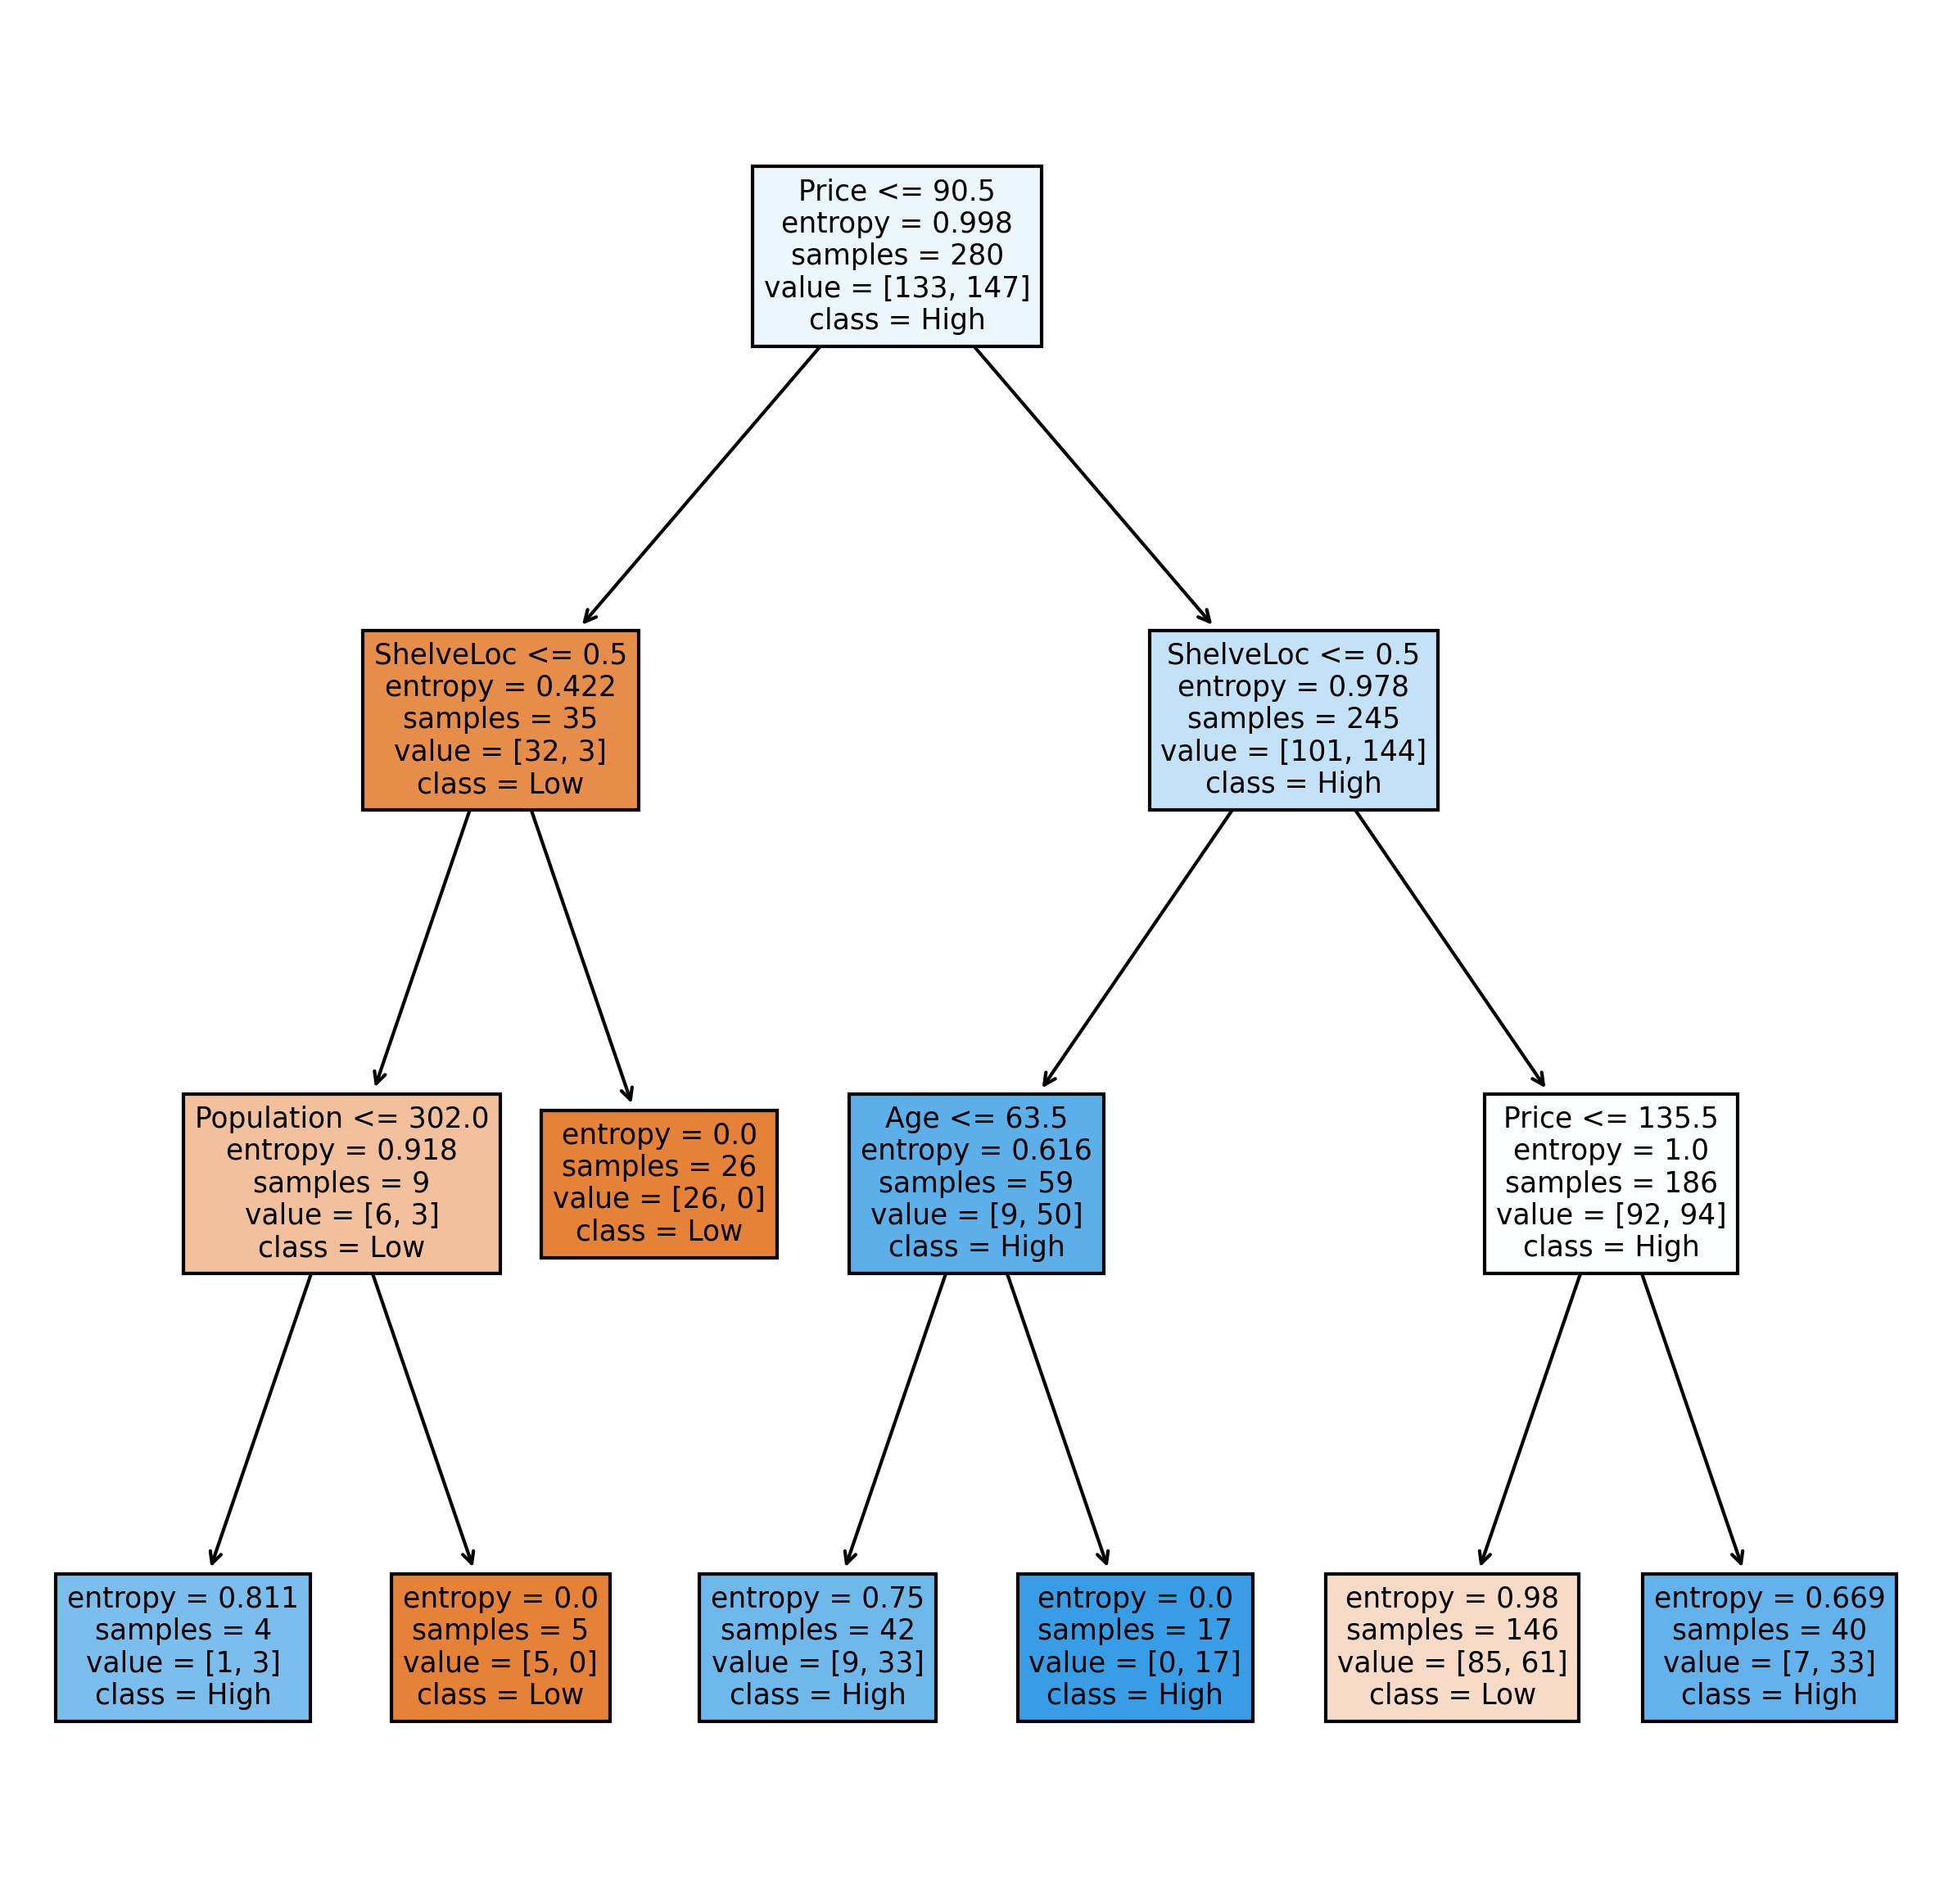

In [104]:
fn = data1.columns
cn = ['Low', 'High']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10,10), dpi=300)
tree.plot_tree(model1, feature_names=fn, class_names=cn, filled=True)

In [106]:
#Accuracy
np.mean(preds1==y_test1)

0.675

####Decision tree Regression accuracy is 52% and the accuracy of the Decision tree Classifier accuracy is 67%, both are poor models.
####But as the Classifier accuracy is higher than Regression model, Classifier model can be considered